<a href="https://colab.research.google.com/github/mykirk98/AI_Drills_2023ver/blob/main/Summer_Seminar_2023_2018036068_%EC%9C%A0%EC%B0%BD%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to the second Seminar of Deep Learning !!
* In this seminar we will look at the spatial filtering and the frequency
filtering.
* We will also perform edge detection using different techniques
* Last but not least but we will look at the segmentation.

This seminar will help you get an idea about how an image is processed in terms of image enhancement and how we can use different type of filters to get the desired output.



## **1 - Packages** ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/doc/1.20/) is the fundamental package for scientific computing with Python.
- [OpenCV](https://opencv.org/) is an open source computer vision and machine learning library.

In [ ]:
import numpy as np
from google.colab import files
from IPython.display import Image
import cv2 as cv
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Run the following cell every time you need to upload a file from your PC to Colab, although it is recommended to upload all the required images once**

In [ ]:
uploaded = files.upload()

# **2 - Convolution**

- Now we will write our own convolution function and we will use this function to perform all the image manuplation in this seminar.
- The following figure illustrastes the whole process of convolution.
  - First we take a kernel(filter) of any size (3x3 in the following example) and then we take a patch from an image of same size.
  - Then we multiply the these matrices and add them, this the value of one output pixel.
  - We keep on doing this until we have the values of all the output pixels.
![](https://drive.google.com/uc?export=view&id=1Ng2X1alEQ4ueTjVBJ1ifzB4F0qKgfkoY)


##### numpy.pad(array,
#####           pad_width=((a, b), (c, d)),
#####           mode='constant'
#####           constant_value=0
#####           )

##### array : 적용할 대상 배열
##### pad_width = a(윗 행), b(아래 행), c(왼쪽 행), d(오른쪽 행) 패댕 크기
##### constant_value : 패딩에 넣을 상수값

In [ ]:
def Convolution(FM,I):
  """
   - This function performs convolution
   - Inputs are Filter mask FM and 2D Image
   - returns a convolved image
   """
  # FM : Filter Mask
  # I : Image
  filter_height = FM.shape[0]   # shape[0] : # of rows
  filter_width = FM.shape[1]    # shae[1] : # of columns
  Padding_Size = filter_height//2   # // : floor method

  Padded_image = np.pad(I, Padding_Size, mode = 'constant', constant_values=0 )   # np.pad : padding method
  Height,Width = I.shape

  Output = np.zeros(I.shape)    # make the frame of output image

  for i in range(Height):   # nested loop
    for j in range(Width):
      image_patch = Padded_image[i:i+filter_height, j:j+filter_width]   # slicing about 'I'
      Product = image_patch * FM    # Convolution
      Output[i,j] = np.sum(Product)   # Output[i,j] = Product[i-1,j-1] + Product[i-1, j] + Product[i-1, j+1]
                                      #             + Product[i, j-1] + Product[i,j] + Product[i, j+1]
                                      #             + Product[i+1,j-1] + Product[i+1, j] + Product[i+1, j+1]

  return Output

- Load image using the OpenCV library, using imread.
  - Note: The digit 0 converts the image from 3 channels to 2 channels because we are mainly dealing with 2D images

- You can confirm that the correct image was loaded by displaying the loaded images using the command "cv2_imshow()"  

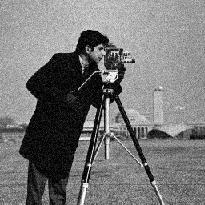

In [ ]:
image_man = cv.imread('/content/drive/MyDrive/Colab Notebooks/images/cameraman.jpg',0)
cv2_imshow(image_man)

# **3 - Spatial Filtering**

In this section we will perform filtering in the spatial domain. The spatial domain refers to the representation of an image its original form.

- We will focus on the characteristics like textures, shapes, edges and other visual attributes that can be observed directly.

- We will go thorugh different types of smoothing filters such as box(Average), Gaussian filter, median filters as well as sharpening filters such as Laplacian filter.

In [ ]:
Box_filter = np.ones((3,3))/9
# 1/9  1/9  1/9
# 1/9  1/9  1/9
# 1/9  1/9  1/9

Gaussian_filter = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]])
Gaussian_filter = Gaussian_filter/16
# 1/16  2/16  1/16
# 2/16  4/16  2/16
# 1/16  2/16  1/16

Output_Box = Convolution(Box_filter, image_man)
Output_Gaussian = Convolution(Gaussian_filter,image_man)


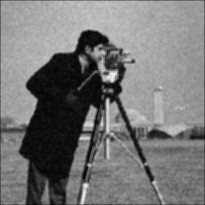

Filtered Image using the 3x3 Box filter None 


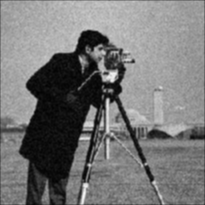

Filtered Image using the Gaussian filter None


In [ ]:
print(f"Filtered Image using the 3x3 Box filter {cv2_imshow(Output_Box)} ")

print(f"Filtered Image using the Gaussian filter {cv2_imshow(Output_Gaussian)}")


**HOME WORK**
Load the test.tif image and apply the averaging filter of  

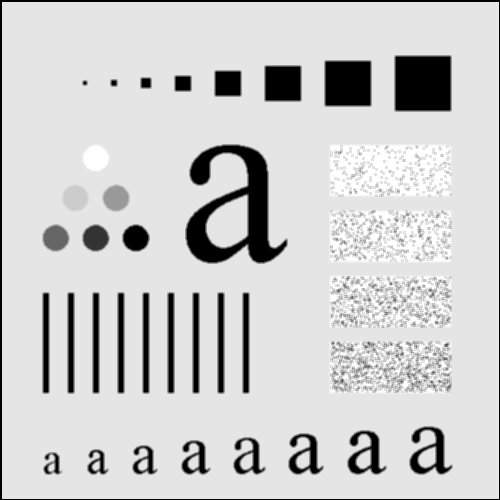

Filtered Image using the Average filter None


In [ ]:
image_test_tif = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)
Padded_image = np.pad(image_test_tif, 1 , mode = 'constant')

height, width = image_test_tif.shape   # height : 440 , weight : 455
output_mean = np.zeros(image_test_tif.shape)    # all zero matrix which size is 440X455
for i in range (2, height-1):
  for j in range (2, width-1):
    n = Padded_image[i-1:i+2, j-1:j+2]
    output_mean[i,j] = np.mean(n[:])

print(f"Filtered Image using the Average filter {cv2_imshow(output_mean)}")

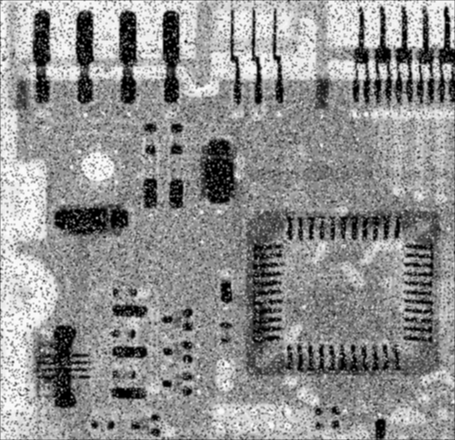

Filtered Image using the Gaussian filter None


In [ ]:
image_board = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/board.tif",0)
Gaussian_filter = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]])
Gaussian_filter = Gaussian_filter/16
# 1/16  2/16  1/16
# 2/16  4/16  2/16
# 1/16  2/16  1/16
Output_Gaussian = Convolution(Gaussian_filter,image_board)
print(f"Filtered Image using the Gaussian filter {cv2_imshow(Output_Gaussian)}")

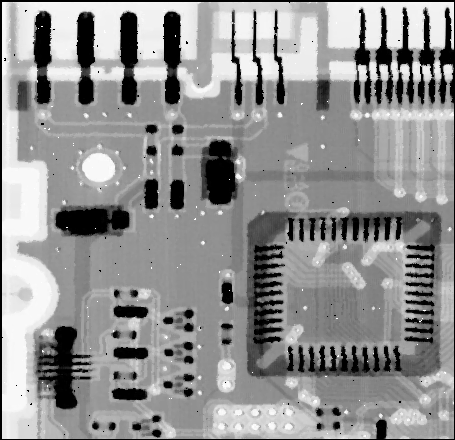

Filtered Image using the Median filter None


In [ ]:
image_board = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/board.tif",0)
Padded_image = np.pad(image_board, 1 , mode = 'constant')

height, width = image_board.shape   # height : 440 , weight : 455
output_median = np.zeros(image_board.shape)    # all zero matrix which size is 440X455
for i in range (2, height-1):
  for j in range (2, width-1):
    n = Padded_image[i-1:i+2, j-1:j+2]    #
    output_median[i,j] = np.median(n[:])

print(f"Filtered Image using the Median filter {cv2_imshow(output_median)}")


In [ ]:
image_board.shape

(440, 455)

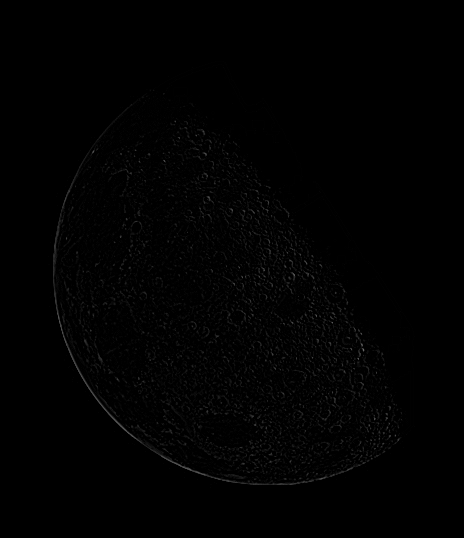

Sharped Image of moon using the laplacian filter None


In [ ]:
image_moon = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/moon.jpg",0)

# Laplacian Filter : It can help detect boundary better
Laplacian_filter = np.array([[0,-1, 0],
                             [-1,4,-1],
                             [0,-1,0]])
# 0 + -1 + 0 + -1 + 4 + -1 + 0 + -1 + 0 = 0

Output_Laplacian = Convolution(Laplacian_filter, image_moon)
#Output_Laplacian += image_moon

print(f'Sharped Image of moon using the laplacian filter {cv2_imshow(Output_Laplacian)}')

original moon image is


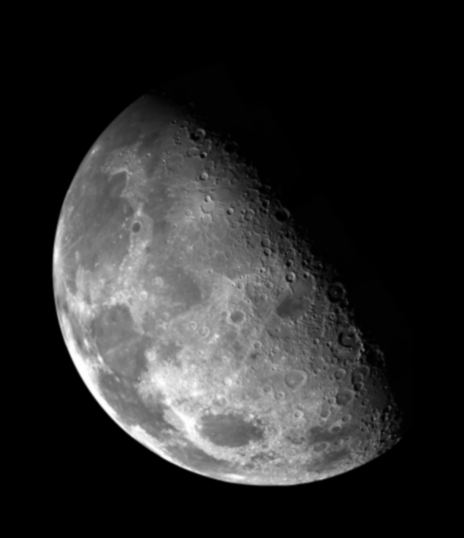

In [ ]:
print('original moon image is')

cv2_imshow(image_moon)

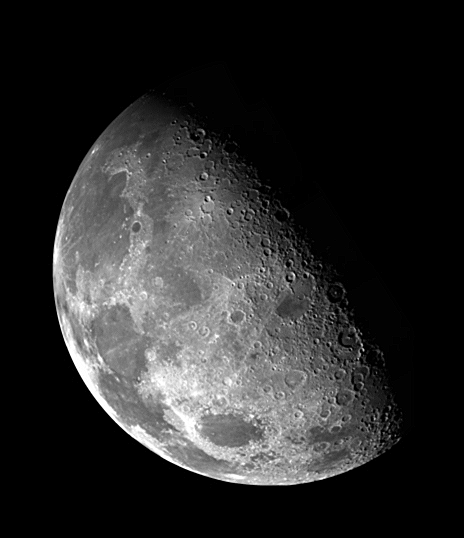

Sharped Image of moon using the laplacian filter None


In [ ]:
Output_Laplacian += image_moon

print(f'Sharped Image of moon using the laplacian filter {cv2_imshow(Output_Laplacian)}')
# more clear than original moon

# **4 - Thresholding**

- Thresholding is minly used to keep or highlight some of the important features in an image.
- Thresholding transformations are particularly usefull for segmentation in which we want tot isolate an object of interest from a background
- The technique used in thresholding is very simple, a threshold value is set, then the next step is check which pixel values fall above or below the threshold value.

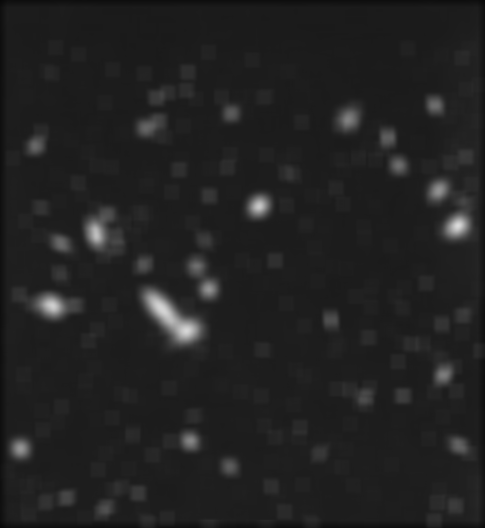

Filtered Image using the 15 x 15 box filter None


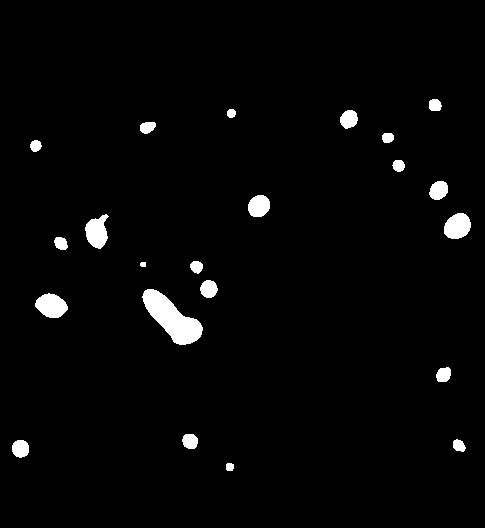

Filtered Image using the 15 x 15 box filter and threshold None


In [ ]:
image_hubbel = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/hubbel.tif",0)
Threshold = 80
Output_hubbel = np.zeros(image_hubbel.shape)
height, width = image_hubbel.shape

box_filter = np.ones((15,15))/(15*15)
output_box_15 = Convolution(box_filter, image_hubbel)

print(f"Filtered Image using the 15 x 15 box filter {cv2_imshow(output_box_15)}")
              # this 15X15 filter will make blur
for i in range(height):
  for j in range(width):
    if output_box_15[i,j] > Threshold:
      output_box_15[i,j] = 255
    else:
      output_box_15[i,j] = 0

print(f"Filtered Image using the 15 x 15 box filter and threshold {cv2_imshow(output_box_15)}")


# **5 - Frequency Domain filtering**

- The frequency domain represents the image in terms of its frequency components.
- Frequency domain techniques are most commonly used for operations like filtering that is, removing specific frequency components.
- We will see different types of filters in the frequency domain and we will also see their effects on the input image




IDEAL LOW PASS FILTER and HIGH PASS FILTER

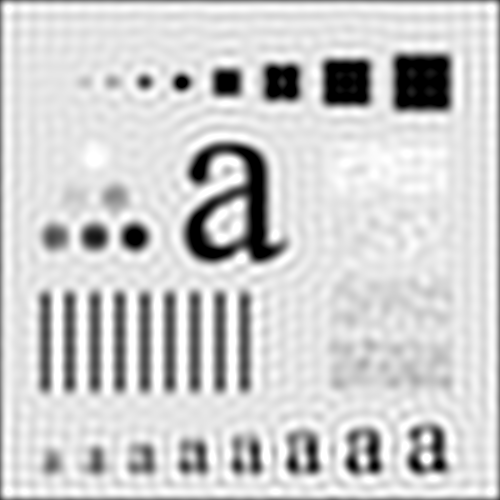

In [ ]:
image_test = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)

Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )    # implicitly constant_value=0
P, Q = Padded_image.shape
# P : 1000
# Q : 1000
Centered_Transform = np.zeros(Padded_image.shape)   # Initialization to all zero matrix which size is 1000X1000

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j] * (np.power((-1),(i+j)))    # Padded_image[i,j] X -1^(i+j)

# np.fft.fft2 : Image of Fourier Transform on image
# Descrete Fourier Transform
DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency

H = np.zeros(Padded_image.shape)


for i in range(P):
  for j in range(Q):
    distance = np.sqrt(np.power((i-500),2) + np.power((j-500),2))
    if distance < Do:
      H[i,j] = 1
    else:
      H[i,j] = 0

G = DFT * H
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

image_test.shape : (500, 500)


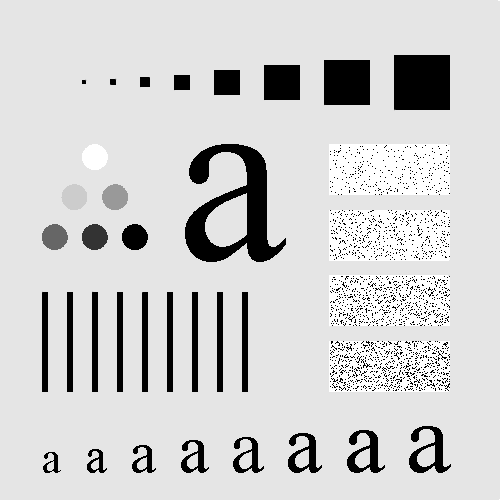

In [ ]:
image_test = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)

print('image_test.shape :', image_test.shape)
cv2_imshow(image_test)

Padded_image.shape : (1000, 1000)


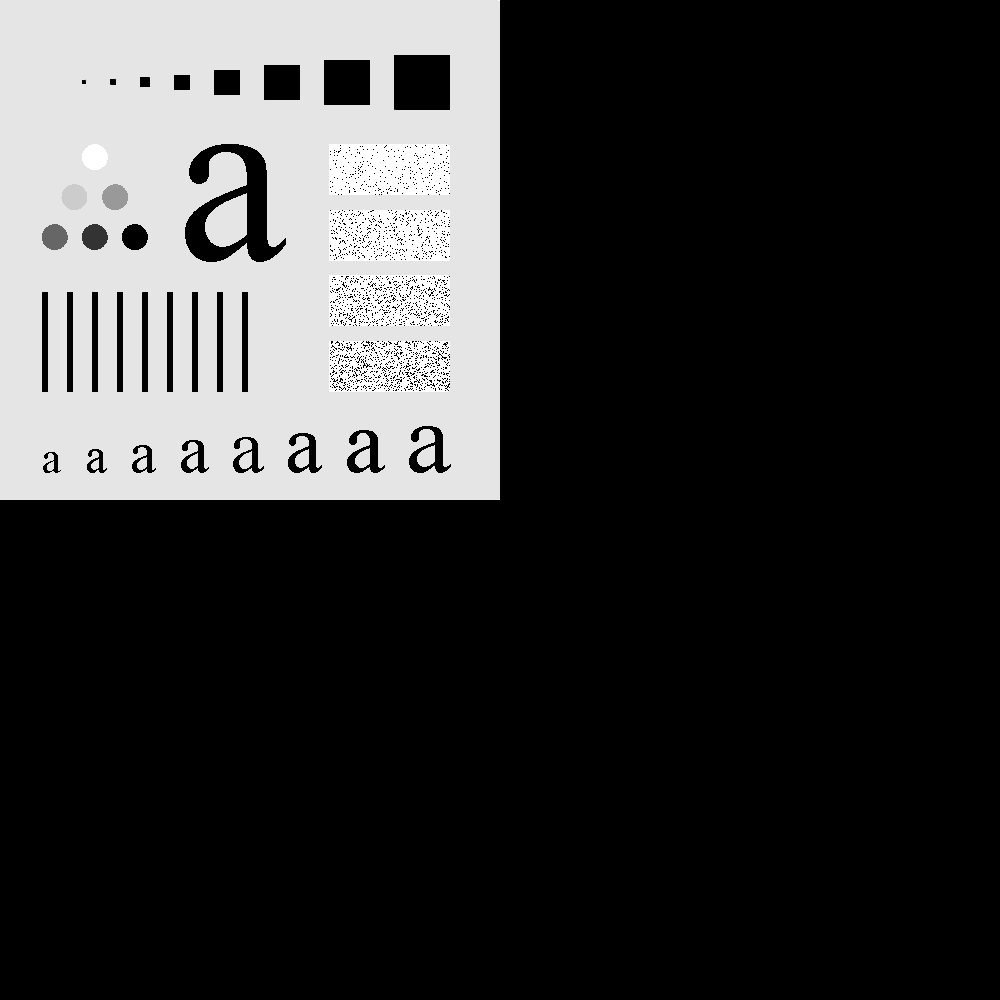

In [ ]:
Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )

print('Padded_image.shape :', Padded_image.shape)
cv2_imshow(Padded_image)

Centered_Transform.shape (1000, 1000)


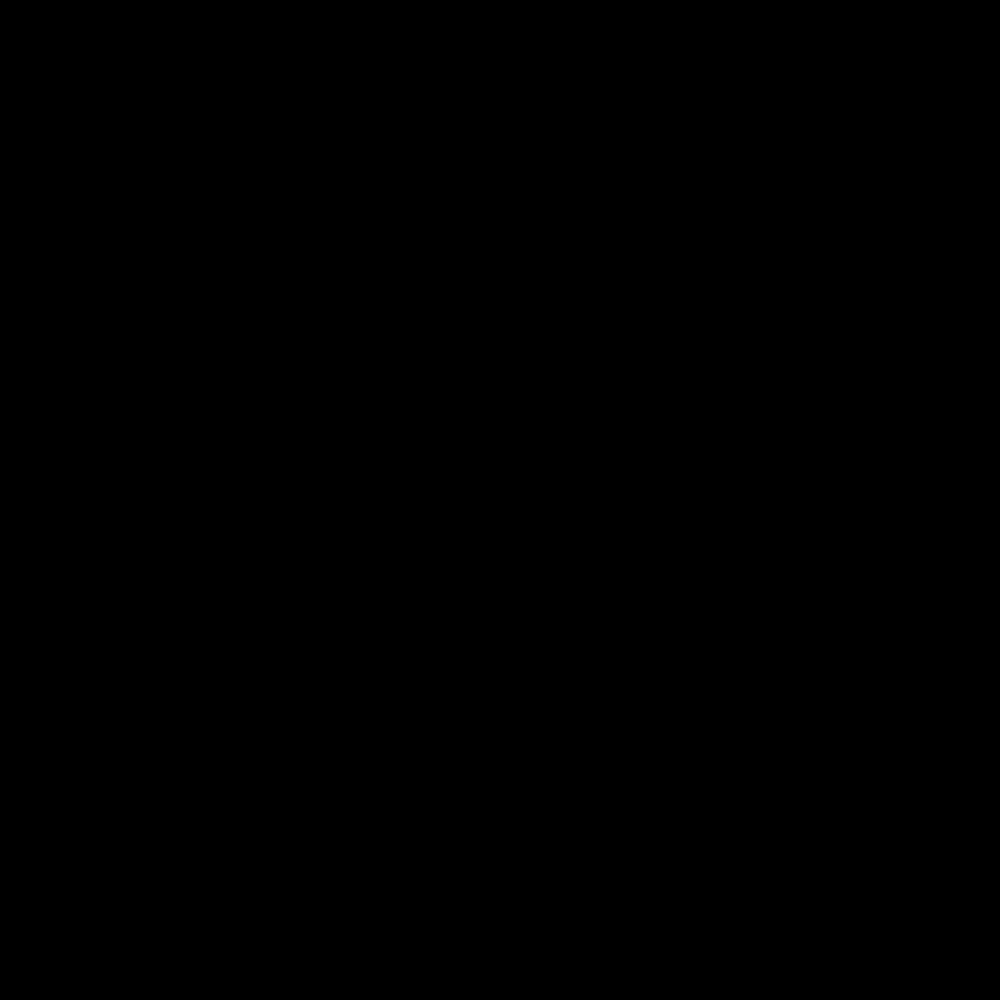

In [ ]:
Centered_Transform = np.zeros(Padded_image.shape)
print('Centered_Transform.shape', Centered_Transform.shape)
cv2_imshow(Centered_Transform)

[[ 229. -229.  229. ...    0.    0.    0.]
 [-229.  229. -229. ...    0.    0.    0.]
 [ 229. -229.  229. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


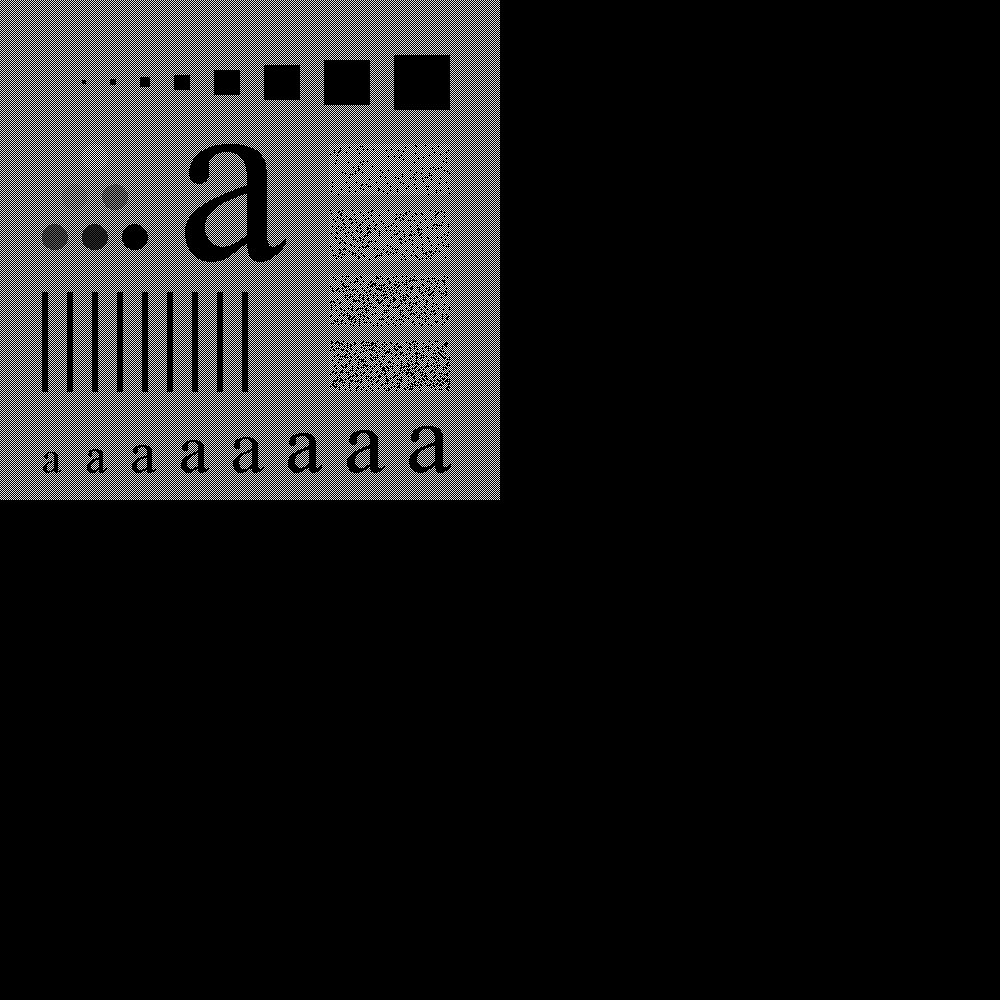

In [ ]:
for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j] * (np.power((-1),(i+j)))

print(Centered_Transform)
cv2_imshow(Centered_Transform)
# if you look closely, you can see black-white-black-white-... pattern. because of line 3

In [ ]:
DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency

H = np.zeros(Padded_image.shape)

In [ ]:
print(DFT.shape)

(1000, 1000)


In [ ]:
for i in range(P):
  for j in range(Q):
    distance = np.sqrt(np.power((i-500),2) + np.power((j-500),2))
    if distance < Do:
      H[i,j] = 1
    else:
      H[i,j] = 0

print(distance.shape)

()


In [ ]:
G = DFT * H
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

In [ ]:
print(Gp.shape)

(1000, 1000)


/usr/local/lib/python3.10/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


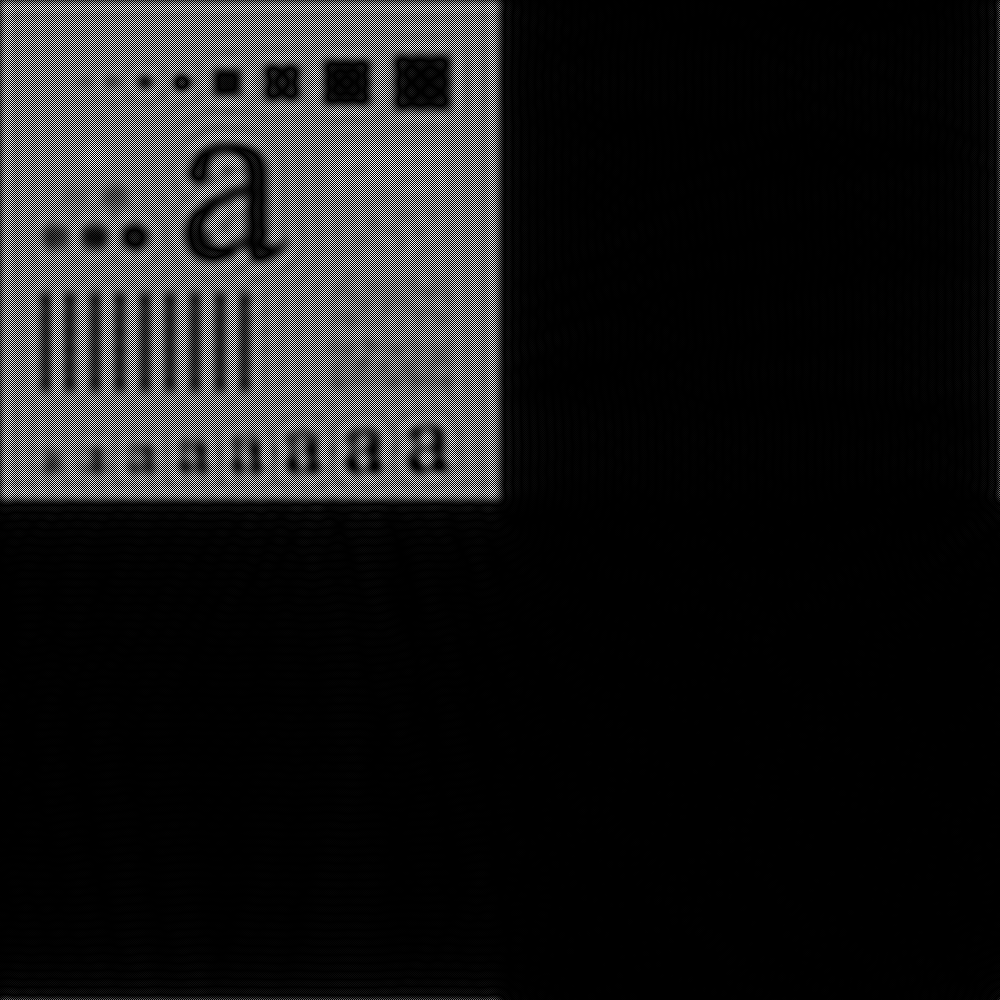

In [ ]:
cv2_imshow(Gp)

In [ ]:
print(Gr.shape)

(1000, 1000)


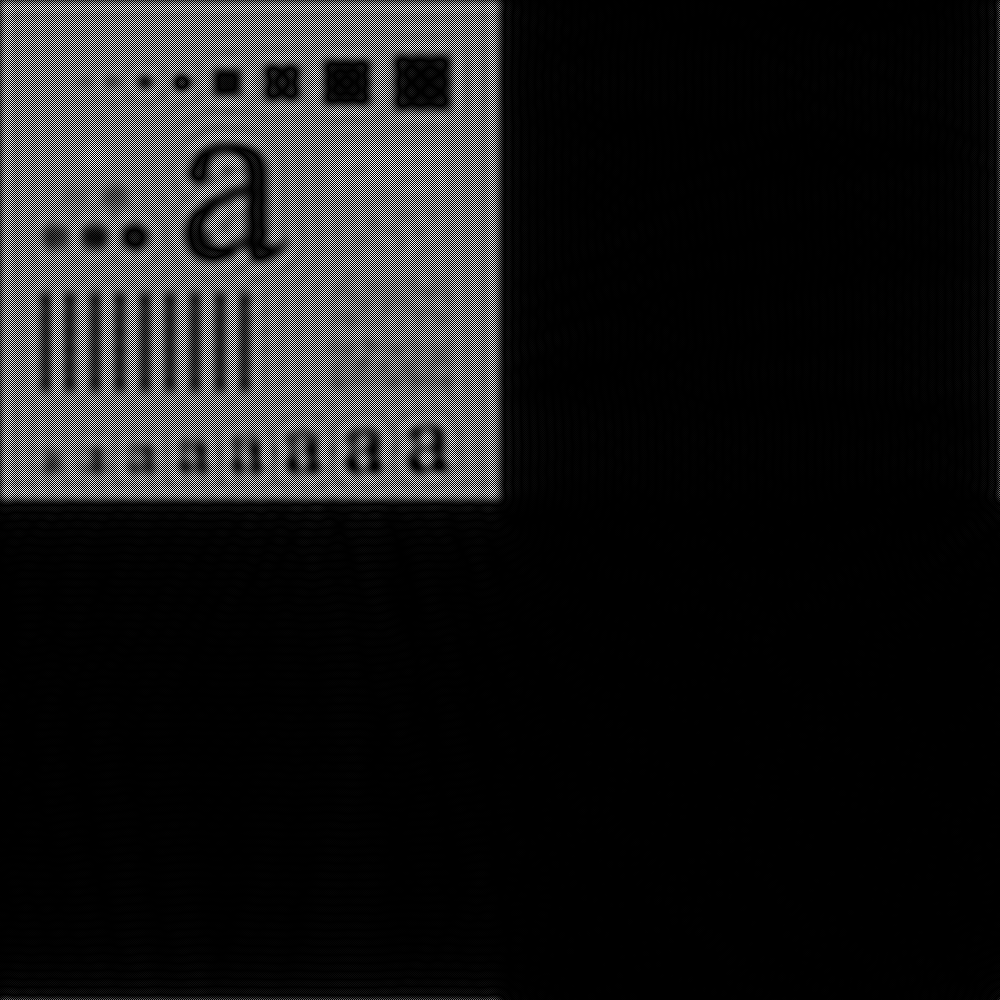

In [ ]:
cv2_imshow(Gr)

(1000, 1000)


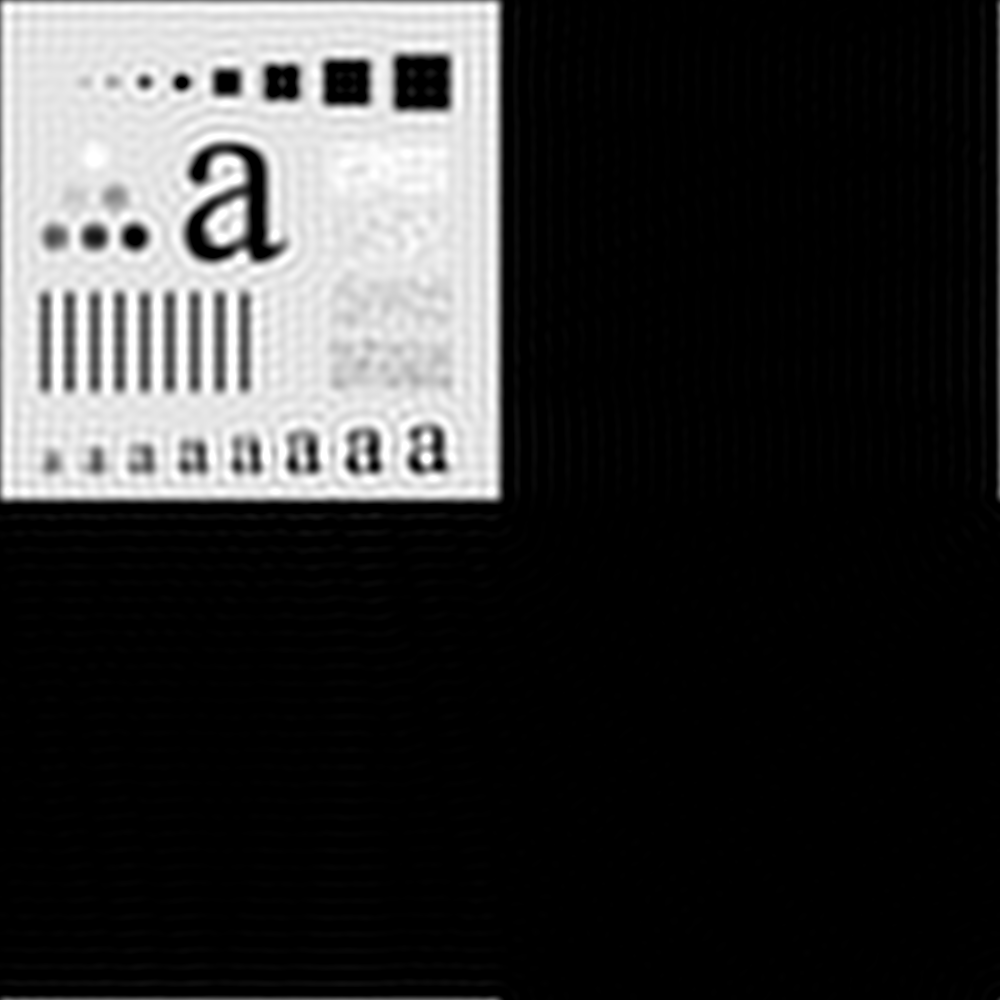

In [ ]:
IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

print(IP.shape)
cv2_imshow(IP)

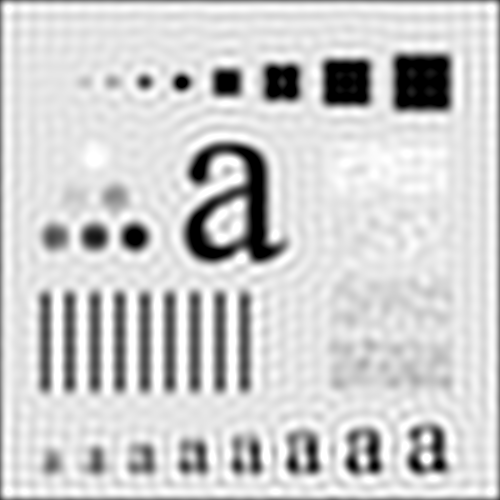

In [ ]:
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

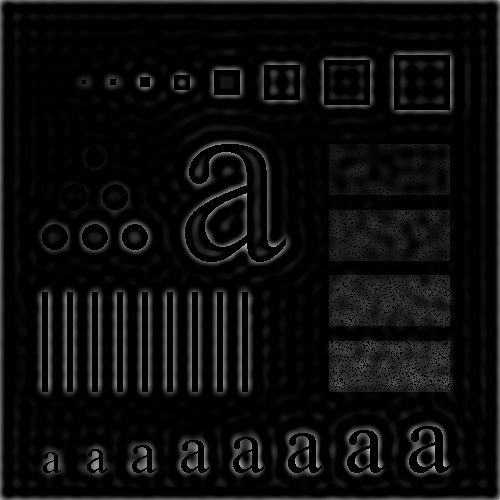

In [ ]:
image_test = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)

Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

# Descrete Fourier Transform
DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency

H = np.zeros(Padded_image.shape)


for i in range(P):
  for j in range(Q):
    distance = np.sqrt(np.power((i-500),2) + np.power((j-500),2))
    if distance < Do:
      H[i,j] = 1
    else:
      H[i,j] = 0

H_IHPF = 1 - H
G = DFT * H_IHPF
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

Butterworth Low pass filters
##### 시간도메인에서 측정한 결과에 적용되는 필터이고 원하지 않는 주파수 영역의 값을 필터 처리할 때 사용 합니다.

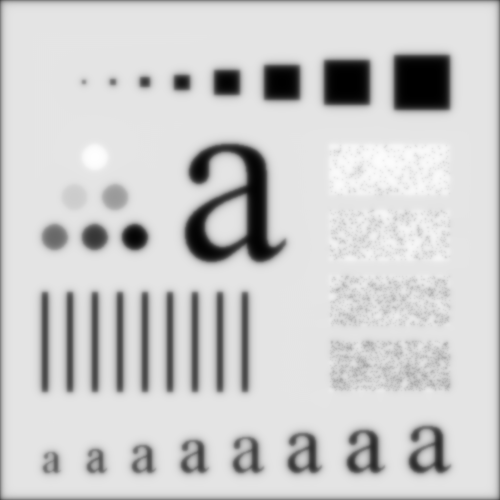

In [ ]:
image_test = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)

Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

# Descrete Fourier Transform
DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency
n = 1  # Check the results by changing this

H2 = np.zeros(Padded_image.shape)
for i in range(P):
  for j in range(Q):
    distance2 = np.sqrt(np.power(((i-500)),2) + np.power(((j-500)),2))
    H2[i,j] = 1/(1+(distance2/Do)**2 * n)

G = DFT * H2
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

<ipython-input-42-7bb14195ac0f>:21: RuntimeWarning: divide by zero encountered in double_scalars
  H2_BHPF[i,j] = 1/(1+(Do/distance2)**2 * n)


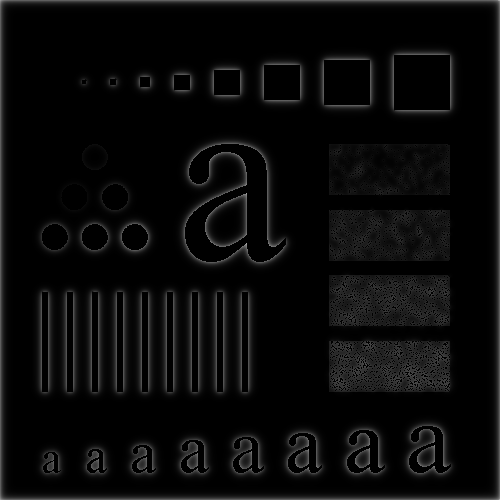

In [ ]:
image_test = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)

Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency
n = 1  # Check the results by changing this

H2_BHPF = np.zeros(Padded_image.shape)
for i in range(P):
  for j in range(Q):
    distance2 = np.sqrt(np.power(((i-500)),2) + np.power(((j-500)),2))
    H2_BHPF[i,j] = 1/(1+(Do/distance2)**2 * n)

G = DFT * H2_BHPF
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

Gaussian Low pass filter

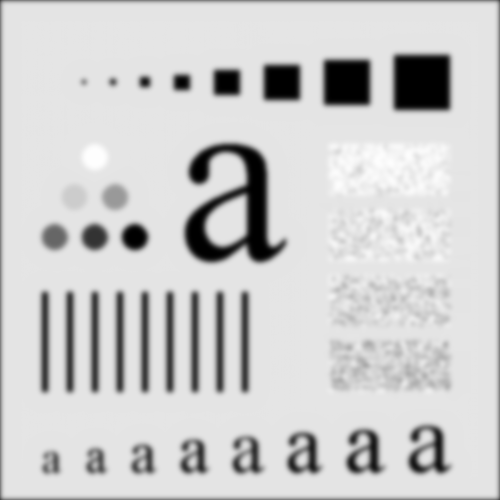

In [ ]:
image_test = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/test.tif",0)

Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency
A = 2*(Do**2)

H3 = np.zeros(Padded_image.shape)
for i in range(P):
  for j in range(Q):
    distance = np.sqrt(np.power(((i-500)),2) + np.power(((j-500)),2))
    H3[i,j] = np.exp((-1*(distance**2))/A)

G = DFT * H3
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

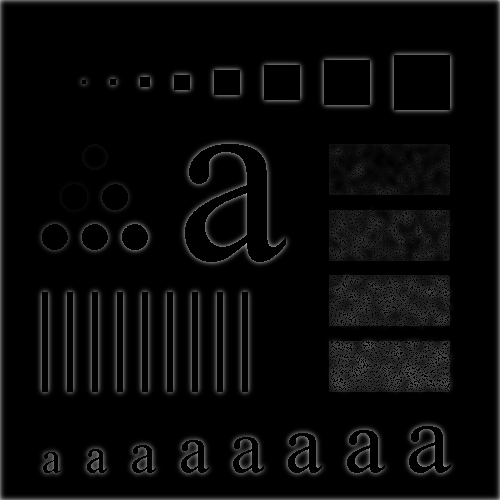

In [ ]:
image_test = cv.imread("test.tif",0)

Padded_image = np.pad(image_test, [(0,500),(0,500)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency
A = 2*(Do**2)

H3 = np.zeros(Padded_image.shape)
for i in range(P):
  for j in range(Q):
    distance = np.sqrt(np.power(((i-500)),2) + np.power(((j-500)),2))
    H3[i,j] = np.exp((-1*(distance**2))/A)

H3_HGPF = 1- H3
G = DFT * H3_HGPF
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

# **6 - Edge Detection**

- Previously we werree using lorm of a tool to reduce noise from an image. Now we will use filters to extract features(edges) from an image.  

- The basic idea behind edge is to look for a neighborhood with strong signs of change or a sudden change in the intensity values.

- We will use Sobel filters and canny edge detection to extract edges from an image.

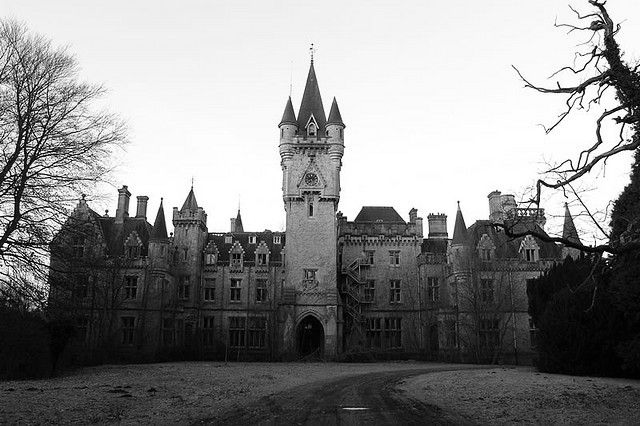

Original image None


In [ ]:
image_building = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/building.png",0)
print(f"Original image {cv2_imshow(image_building)}")

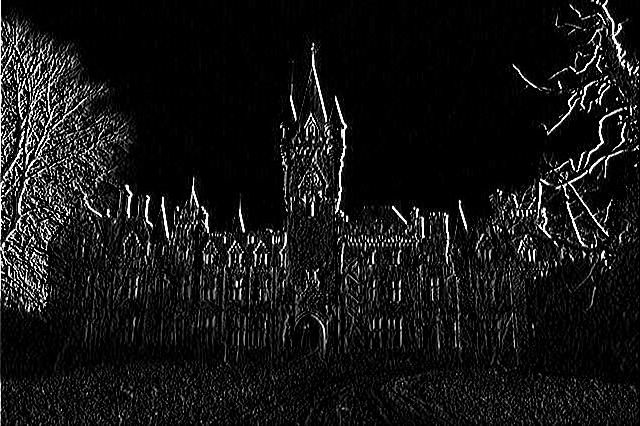

Edges in the direction of x-axis None





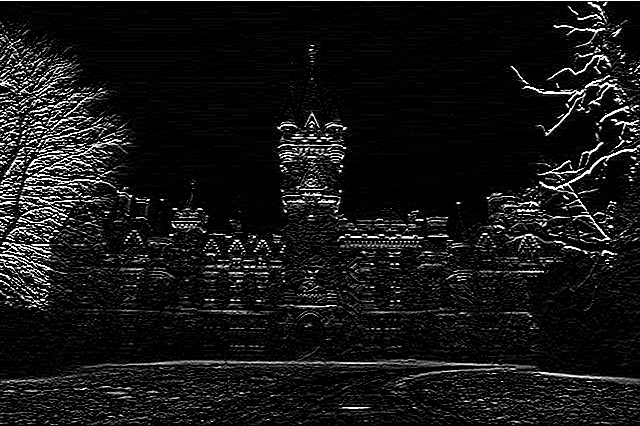

Edges in the direction of y-axis None





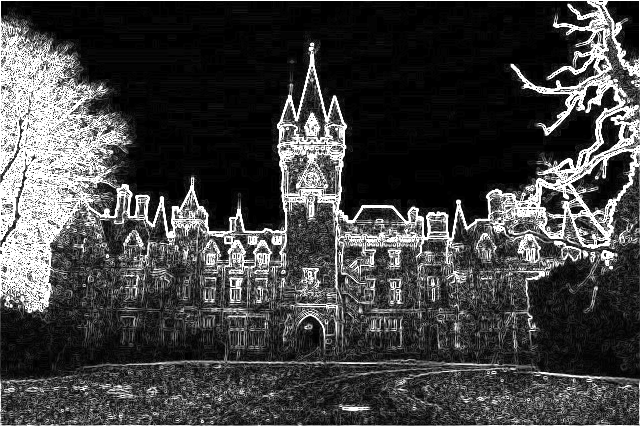

Resultant Magnitude None


In [ ]:
# X-axis
Sobel_x = np.array([[-1,0,1], #sobel filter in x-axis direction
                    [-2,0,2],
                    [-1,0,1]])
# Y-axis
Sobel_y = Sobel_x.T #sobel filter in y-axis direction

Out_x = Convolution(Sobel_x, image_building)
print(f"Edges in the direction of x-axis {cv2_imshow(Out_x)}\n\n\n")

Out_y = Convolution(Sobel_y, image_building)
print(f"Edges in the direction of y-axis {cv2_imshow(Out_y)}\n\n\n")

# square
Magnitude_Out_x = (Out_x)**2
Magnitude_Out_y = (Out_y)**2
# root
RM = (Magnitude_Out_x + Magnitude_Out_y)**0.5 #Resultant magnitude of both edges

print(f'Resultant Magnitude {cv2_imshow(RM)}')

Canny edge detection performs a technique known as non maximum suppression. It simply thins the thick edges.
We will see the difference between our results and the canny's results

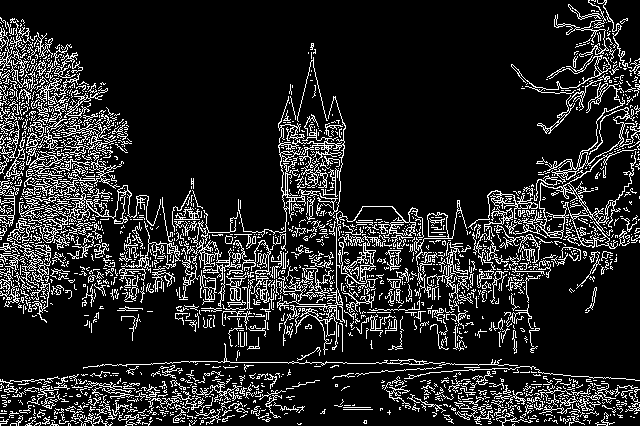

Edges of building using the canny edge detection None


In [ ]:
canny_edges = cv.Canny(image_building, 75, 150)
print(f'Edges of building using the canny edge detection {cv2_imshow(canny_edges)}')

# HomeWork
Apply sobel edge detection on checker.png and checker noisy.png. What is the problem with the second image output and how can you solve this?
Final edge image should be thresholded.

##### Q : What is the proble with the second image output?
##### A : noise exist on image

##### Q : how can you solve this?
##### A :

Original image :


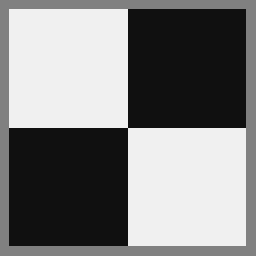

In [ ]:
image_checker = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/checker.png",0)
print('Original image :')
cv2_imshow(image_checker)

In [ ]:
print('shape :', image_checker.shape)

shape : (256, 256)


In [ ]:
print(image_checker[2][2])
print(image_checker[50][50])
print(image_checker[50][200])

128
240
16


Original image :


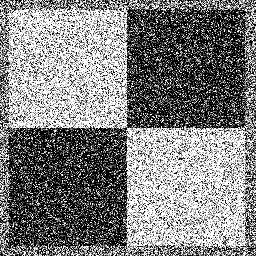

In [ ]:
image_checker_noisy = cv.imread("/content/drive/MyDrive/Colab Notebooks/images/checker-noisy.png",0)
print('Original image :')
cv2_imshow(image_checker_noisy)

In [ ]:
print('shape :', image_checker_noisy.shape)

shape : (256, 256)


In [ ]:
print(image_checker_noisy[:16][:16])

[[131   7   6 ...  88  14 131]
 [248  36   3 ...   0 255 248]
 [  1 156 190 ...  95 217   1]
 ...
 [173 224 252 ... 149 175 173]
 [ 96 145 255 ...   0  77  96]
 [246 223  22 ... 255 233 246]]


# Choose filter CASE1 or CASE2

# CASE 1 : GAUSSIAN FILTER

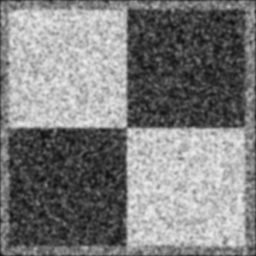

In [ ]:
Padded_image = np.pad(image_checker_noisy, [(0,256),(0,256)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency
A = 2*(Do**2)

H3 = np.zeros(Padded_image.shape)
for i in range(P):
  for j in range(Q):
    distance = np.sqrt(np.power(((i-256)),2) + np.power(((j-256)),2))
    H3[i,j] = np.exp((-1*(distance**2))/A)

G = DFT * H3
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

# CASE 2 : BUTTERWORTH FILTER

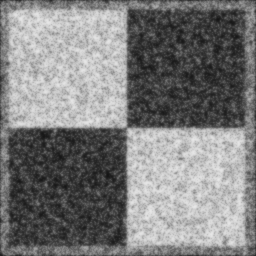

In [ ]:
Padded_image = np.pad(image_checker_noisy, [(0,256),(0,256)], mode = 'constant' )
P, Q = Padded_image.shape

Centered_Transform = np.zeros(Padded_image.shape)

for i in range(P):
  for j in range(Q):
    Centered_Transform[i,j] = Padded_image[i,j]*(np.power((-1),(i+j)))

# Descrete Fourier Transform
DFT = np.fft.fft2(Centered_Transform)

Do = 60 #check the results by changing this cutoff frequency
n = 1  # Check the results by changing this

H2 = np.zeros(Padded_image.shape)
for i in range(P):
  for j in range(Q):
    distance2 = np.sqrt(np.power(((i-256)),2) + np.power(((j-256)),2))
    H2[i,j] = 1/(1+(distance2/Do)**2 * n)

G = DFT * H2
Gp = np.fft.ifft2(G)
Gr = np.real(Gp)

IP = np.zeros(G.shape)
h,w = G.shape
for i in range (h):
  for j in range (w):
    IP[i,j] = Gr[i,j]*np.power((-1),(i+j))

# Removing paddings
g = np.zeros((P//2,Q//2))
for i in range(P//2):
  for j in range(Q//2):
    g[i,j] = IP[i,j]


cv2_imshow(g)

# Then, Let's see with convolution by combining all possible filter sizes and thresholds.

Before Threshold : 16  /  3 x 3 box filter :


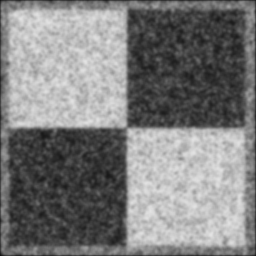





After Threshold : 16  /  3 x 3 box filter :


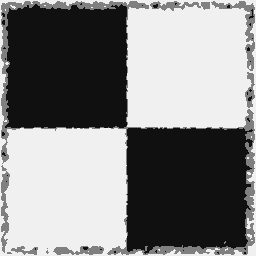





Before Threshold : 16  /  5 x 5 box filter :


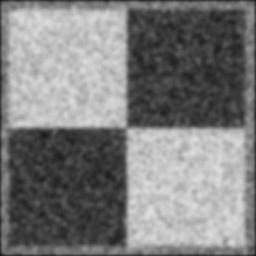





After Threshold : 16  /  5 x 5 box filter :


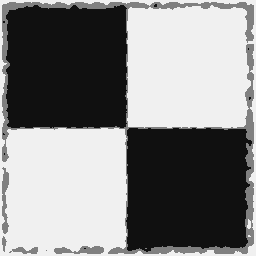





Before Threshold : 16  /  7 x 7 box filter :


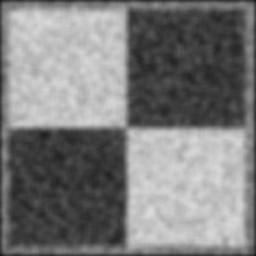





After Threshold : 16  /  7 x 7 box filter :


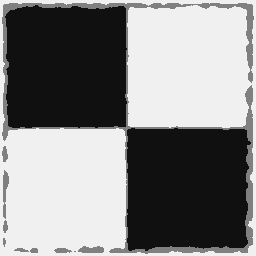





Before Threshold : 16  /  9 x 9 box filter :


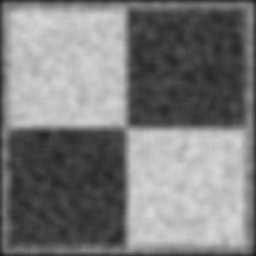





After Threshold : 16  /  9 x 9 box filter :


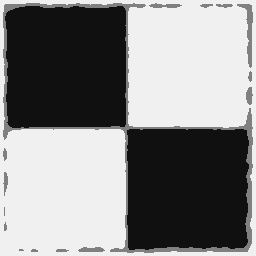





Before Threshold : 16  /  11 x 11 box filter :


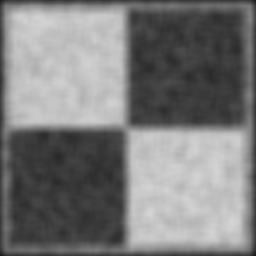





After Threshold : 16  /  11 x 11 box filter :


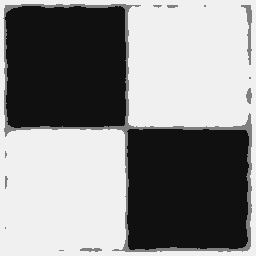





Before Threshold : 16  /  13 x 13 box filter :


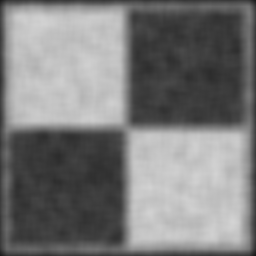





After Threshold : 16  /  13 x 13 box filter :


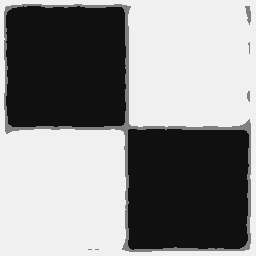





Before Threshold : 32  /  3 x 3 box filter :


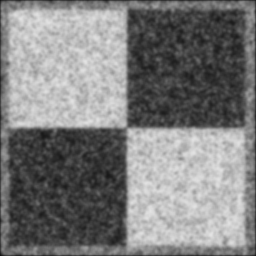





After Threshold : 32  /  3 x 3 box filter :


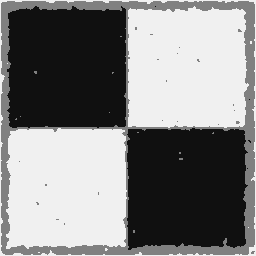





Before Threshold : 32  /  5 x 5 box filter :


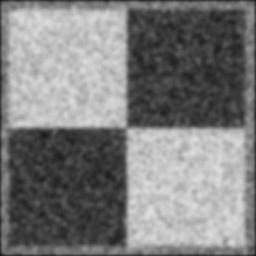





After Threshold : 32  /  5 x 5 box filter :


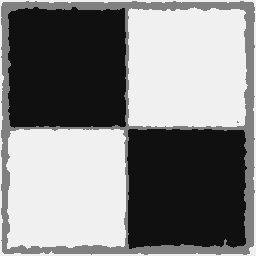





Before Threshold : 32  /  7 x 7 box filter :


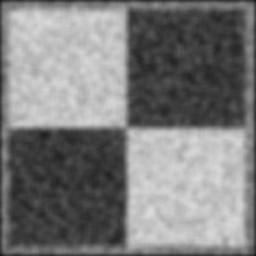





After Threshold : 32  /  7 x 7 box filter :


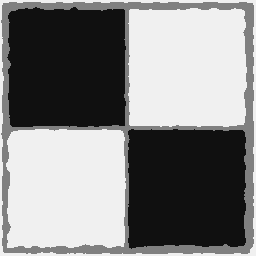





Before Threshold : 32  /  9 x 9 box filter :


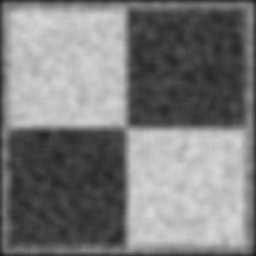





After Threshold : 32  /  9 x 9 box filter :


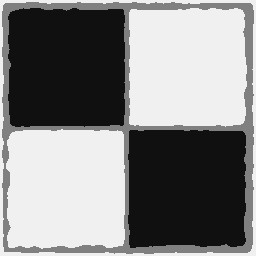





Before Threshold : 32  /  11 x 11 box filter :


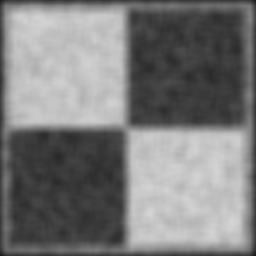





After Threshold : 32  /  11 x 11 box filter :


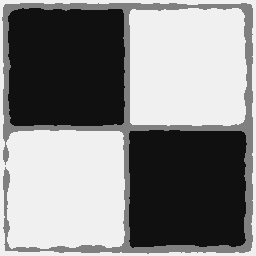





Before Threshold : 32  /  13 x 13 box filter :


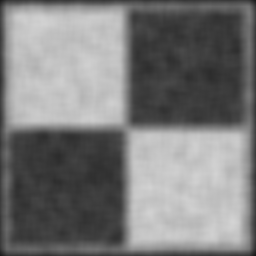





After Threshold : 32  /  13 x 13 box filter :


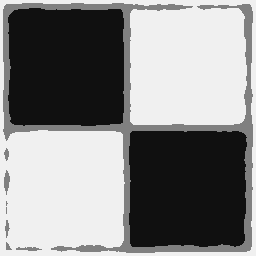





Before Threshold : 48  /  3 x 3 box filter :


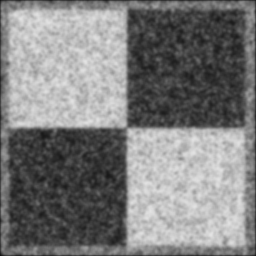





After Threshold : 48  /  3 x 3 box filter :


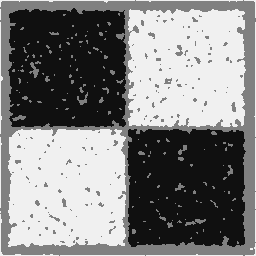





Before Threshold : 48  /  5 x 5 box filter :


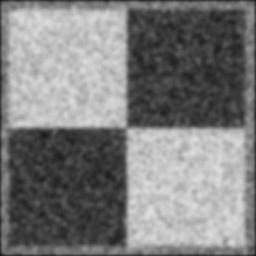





After Threshold : 48  /  5 x 5 box filter :


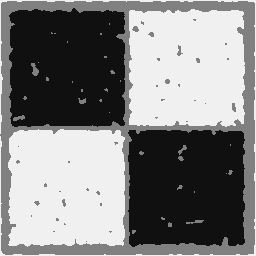





Before Threshold : 48  /  7 x 7 box filter :


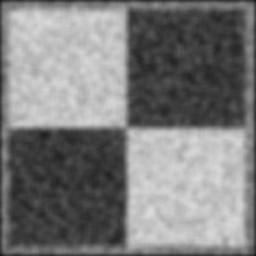





After Threshold : 48  /  7 x 7 box filter :


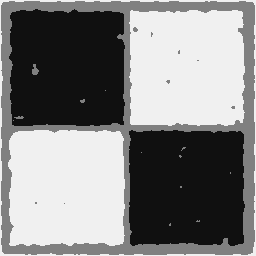





Before Threshold : 48  /  9 x 9 box filter :


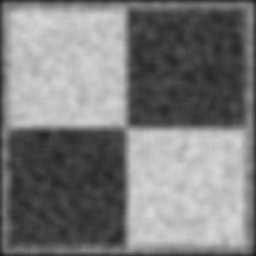





After Threshold : 48  /  9 x 9 box filter :


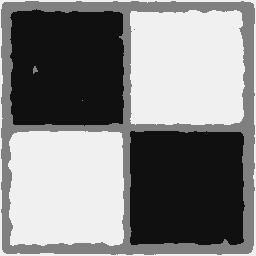





Before Threshold : 48  /  11 x 11 box filter :


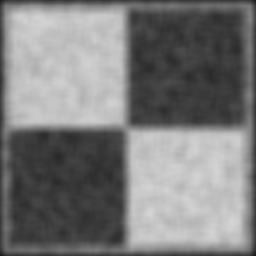





After Threshold : 48  /  11 x 11 box filter :


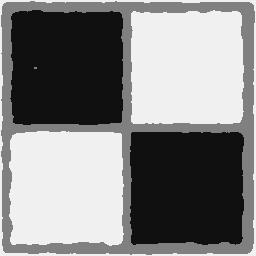





Before Threshold : 48  /  13 x 13 box filter :


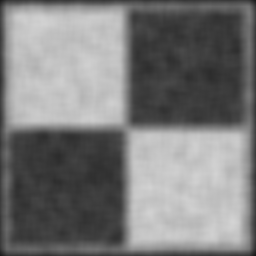





After Threshold : 48  /  13 x 13 box filter :


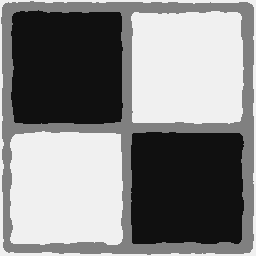

In [ ]:
Threshold = 128
alphas = np.array([16, 32, 48])
for alpha in alphas:
  Threshold_1 = 128 - alpha
  Threshold_2 = 128 + alpha

  Output_hubbel = np.zeros(g.shape)
  height, width = g.shape

  filter_sizes = np.array([3, 5, 7, 9, 11, 13])

  for filter_size in filter_sizes:
    box_filter = np.ones((filter_size,filter_size))/(filter_size*filter_size)
    output_box = Convolution(box_filter, g)

    print("Before Threshold : {}  /  {} x {} box filter :".format(alpha, filter_size, filter_size))
    cv2_imshow(output_box)
    print("\n\n\n")
                  # this 15X15 filter will make blur
    for i in range(height):
      for j in range(width):
        if output_box[i,j] < Threshold_1:
          output_box[i,j] = 240
        elif output_box[i,j] > Threshold_1 and output_box[i][j] < Threshold_2:
          output_box[i][j] = 128
        else:
          output_box[i,j] = 16

    print("After Threshold : {}  /  {} x {} box filter :".format(alpha, filter_size, filter_size))
    cv2_imshow(output_box)
    print("\n\n\n")